In [1]:
# Importing Packages
import numpy as np
import pandas as pd

In [2]:
data = 'https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-02-car-price/data.csv'
!wget $data #This is for linux machine

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# Loading the data
df = pd.read_csv('../datasets/carPridiction/data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


As we can see there are some inconsistency with the data. Some of the header have underscore some don't. Some have smallcase some don't. So we now have to clean data and make it consistant.

## Explonatory Data Analysis

In [4]:
# Making heading consistent
# df.columns # It will return all the headers.
df.columns = df.columns.str.lower().str.replace(' ','_') # It will make all the headers lowercase and will replace spaces with underscore.
df.head()


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
# Making the data consistant
column_string = list(df.dtypes[df.dtypes == 'object'].index)
# column_string
for col in column_string:
    df[col] = df[col].str.lower().str.replace(' ','_') # It will take every column and modify every element by looping through it.
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [6]:
# Getting to know the data more
for col in df.columns:
    print(col)
    print(df[col].unique()[:10])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series' '200'
 '200sx' '240sx' '240']
914

year
[2011 2012 2013 1992 1993 1994 2017 1991 2016 1990]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel'
 'electric' 'flex-fuel_(premium_unleaded_recommended/e85)' 'natural_gas'
 'flex-fuel_(premium_unleaded_required/e85)'
 'flex-fuel_(unleaded/natural_gas)']
10

engine_hp
[335. 300. 230. 320. 172. 160. 130. 158. 240. 248.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.  0. nan 10.  3. 16.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'


In [8]:
# Importing ploting and visualizing packages
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline

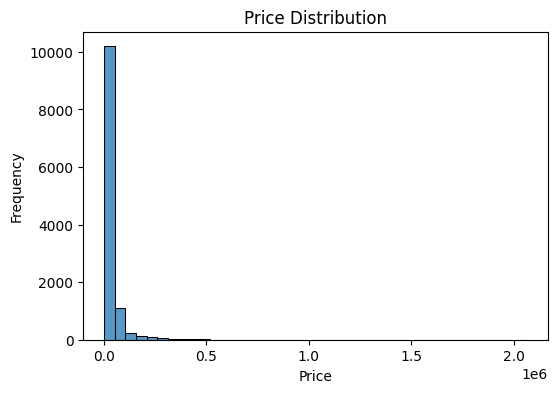

In [20]:
# Visualizing data
plt.figure(figsize=(6,4))
sns.histplot(df.msrp, bins=40)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')

plt.show()

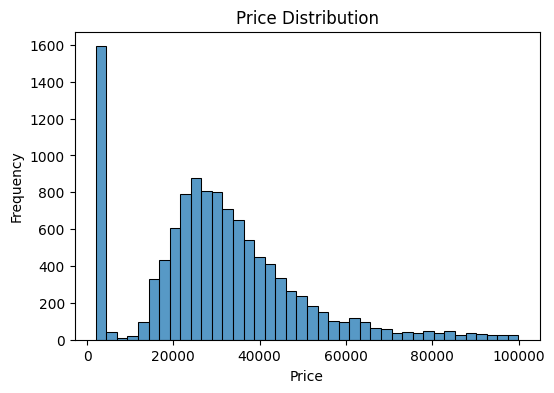

In [19]:
#Zooming in
plt.figure(figsize=(6,4))
sns.histplot(df.msrp[df.msrp < 100000], bins=40)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')

plt.show()

In [23]:
print(np.log([1,10,100,1000,10000]))
print(np.log([0,1,10,100,1000,10000])) #will give a warning or error as log(0) is undefined. 
print(np.log([0 + 1,1 + 1,10 + 1,100 + 1,1000 + 1,10000 + 1]))
print(np.log1p([0,1,10,100,1000,10000]))

[0.         2.30258509 4.60517019 6.90775528 9.21034037]
[      -inf 0.         2.30258509 4.60517019 6.90775528 9.21034037]
[0.         0.69314718 2.39789527 4.61512052 6.90875478 9.21044037]
[0.         0.69314718 2.39789527 4.61512052 6.90875478 9.21044037]


e:\app\Python\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


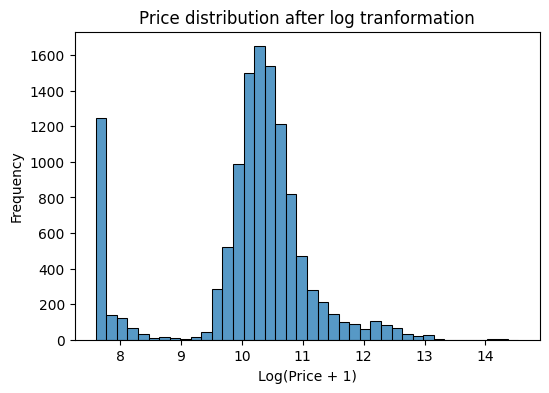

In [28]:
# Log transformation for normalizing the data
log_values = np.log1p(df.msrp)
plt.figure(figsize=(6, 4))

sns.histplot(log_values, bins=40)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Price distribution after log tranformation')

plt.show()
# log_values